##  Analysis of average water level, precipitation and temperature in California

In [1]:
#import libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
#token for NOAA website
token = {'token':'rohjBReJDEghXtgEhKZOCTClXlJzpOaR'}

In [3]:
def url_to_dataframe(u):
    """
    extract the content inside an url and convert it to a dataframe
    """
    jobj = requests.get(url = u, headers = token).json()
    df = pd.DataFrame(jobj['metadata'], jobj['data'])
    df = pd.DataFrame(df.index.values.tolist(),columns =[*df.index[0]])
    return df

In [4]:
def scrape_data_annual(s_id,Year,p,d):
    """
    scrape water level data of each each station in a particular year
    """
    d_url = {}
    url1 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0101&end_date='+str(Year)+'0201&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url2 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0202&end_date='+str(Year)+'0302&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url3 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0303&end_date='+str(Year)+'0403&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url4 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0404&end_date='+str(Year)+'0504&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url5 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0505&end_date='+str(Year)+'0605&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url6 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0606&end_date='+str(Year)+'0706&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url7 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0707&end_date='+str(Year)+'0807&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url8 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0808&end_date='+str(Year)+'0908&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url9 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'0909&end_date='+str(Year)+'1009&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url10 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'1010&end_date='+str(Year)+'1110&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url11 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'1111&end_date='+str(Year)+'1211&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json'
    url12 = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date='+str(Year)+'1212&end_date='+str(Year)+'1231&station='+str(s_id)+'&product='+str(p)+'&datum='+str(d)+'&units=english&time_zone=gmt&interval=h&application=ports_screen&format=json' 
    for u in [url1,url2,url3,url4,url5,url6,url7,url8,url9,url10,url11,url12]:
        d_url[u] = url_to_dataframe(u)
    df = pd.concat([d_url[url1],d_url[url2],d_url[url3],d_url[url4],d_url[url5],d_url[url6],d_url[url7],d_url[url8],d_url[url9],d_url[url10]])
    return df

In [5]:
def scrape_data_all(s_id,sy,ey,p,d):
    """
    scrape water level data of each station within a certain year range
    """
    s_list = []
    for y in range(sy,ey+1):
        s_list.append(scrape_data_annual(s_id,y,p,d).loc[::240])
    s_list = pd.concat(s_list)
    s_list['Year'] = s_list['t'].str.slice(stop=4)
    s_list['v'] = pd.to_numeric(s_list['v'])
    s_list['avg_water_level'] = s_list.groupby('Year')['v'].mean()
    s_avg_wl = pd.DataFrame()
    s_avg_wl['avg_water_level'] = s_list.groupby('Year')['v'].mean()
    return s_avg_wl

In [6]:
sf_id = 9414290 #San Francisco station ID
r_id = 9414523 #Redwood station ID
sb_id = 9411340 #Santa Barbara station ID
la_id = 9410660 #Los Angeles station ID
sd_id = 9410170 #San Diego station ID

In [7]:
#avg water level data in SF between 2000~2021
sf_avg_wl = scrape_data_all(sf_id,2000,2021,'water_level','MSL') 

In [8]:
#avg water level data in Redwood between 2000~2021
r_avg_wl = scrape_data_all(r_id,2000,2021,'water_level','MSL')  

In [9]:
#avg water level data in Santa Barbara between 2000~2021
sb_avg_wl = scrape_data_all(sb_id,2006,2021,'water_level','MSL') 

In [10]:
#avg water level data in Los Angeles between 2000~2021
la_avg_wl = scrape_data_all(la_id,2000,2021,'water_level','MSL')

In [11]:
#avg water level data in San Diego between 2000~2021
sd_avg_wl = scrape_data_all(sd_id,2000,2021,'water_level','MSL')

In [12]:
def scrape_data2(c_id,sy,ey,p):
    """
    Scrape precipitation and average temperature data of each station between a certain year range
    """
    url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid=GHCND:'+str(c_id)+'&datatypeid='+str(p)+'&limit=1000&startdate='+str(sy)+'-01-01&enddate='+str(ey)+'-12-31&units=standard'
    data = requests.get(url, headers = token).json()
    return pd.json_normalize(data['results'])

In [13]:
def combine_data(c_id,p):
    """
    Combine precipitation and average temperature data of each station between 2000~2021
    """
    c_l =  pd.concat([scrape_data2(c_id,2000,2009,p),scrape_data2(c_id,2010,2019,p),scrape_data2(c_id,2020,2021,p)])[['date','value']]
    c_l['Year'] = c_l['date'].str.slice(stop=4)
    c_l['value'] = pd.to_numeric(c_l['value'])
    c_avg_p = pd.DataFrame()
    c_avg_p[str(p)] = c_l.groupby('Year')['value'].mean()
    return c_avg_p

In [14]:
def plot_city(df,c):
    """
    plot Average Water Level, Precipitation, Temperature trends of each station between 2000~2021
    """
    x = df.index
    y1 = df.iloc[:,0]
    y2 = df.iloc[:,1]
    y3 = df.iloc[:,2]
    fig, ax1 = plt.subplots(figsize=(30,5)) 
    plt.setp(ax1.get_xticklabels(), fontsize=15)
    plt.setp(ax1.get_yticklabels(), fontsize=15)
    line1, = ax1.plot(x,y1, color = 'red',label='avg_water_level')
    ax2 = ax1.twinx()
    plt.setp(ax2.get_yticklabels(), fontsize=15)
    line2, = ax2.plot(x,y2, color = 'blue',label='PRCP') 
    ax3 = ax1.twinx()
    plt.setp(ax3.get_yticklabels(), fontsize=15)
    line3, = ax3.plot(x,y3, color = 'green',label='TAVG') 
    plt.legend(bbox_to_anchor=(1, 1.27),handles=[line1,line2,line3],loc="upper right",fontsize=12.8)
    ax1.set_title('Average Water Level, Precipitation, Temperature trends in '+str(c)+' county ('+str(df.index[0])+'~'+str(df.index[-1])+')', fontsize=25)
    plt.show()

In [15]:
sf_id = 'USW00023272' #San Francisco station ID
la_id = 'USW00023174' #Los Angeles station ID
r_id = 'USC00216839'  #Redwood station ID
sb_id = 'USW00023190' #Santa Barbara station ID
sd_id = 'USW00023188' #San Diego station ID

In [16]:
#Combine average water level, precipitation, Temperature of San Francisco county into one dataset
SF_df = pd.merge(pd.merge(sf_avg_wl,combine_data(sf_id,'PRCP'),left_index=True, right_index=True),combine_data(sf_id,'TAVG'),left_index=True, right_index=True)
SF_df

,avg_water_level,PRCP,TAVG
Year,,,
2000,-0.329203,2.085833,57.266667
2001,-0.323908,2.651667,57.600000
2002,-0.334764,1.871667,56.900000
2003,-0.274723,1.650000,58.208333
2004,-0.229994,1.936667,58.300000
2005,-0.095924,2.756667,57.916667
2006,-0.015331,2.460000,56.725000
2007,-0.424185,1.179167,57.250000
2008,-0.286848,1.392500,57.350000


In [17]:
#Compute correlation matrix
SF_df.corr()

,avg_water_level,PRCP,TAVG
avg_water_level,1.000000,0.115979,0.585713
PRCP,0.115979,1.000000,-0.185149
TAVG,0.585713,-0.185149,1.000000


In [18]:
#Combine average water level, precipitation, Temperature of Santa Barbara county into one dataset
SB_df = pd.merge(pd.merge(sb_avg_wl,combine_data(sb_id,'PRCP'),left_index=True, right_index=True),combine_data(sb_id,'TAVG'),left_index=True, right_index=True)
SB_df

,avg_water_level,PRCP,TAVG
Year,,,
2006,-0.352666,1.213333,58.816667
2007,-0.441977,0.699167,58.690909
2008,-0.323419,1.384167,59.375000
2009,-0.296541,1.100000,58.975000
2010,-0.395566,2.289167,58.275000
2011,-0.307844,1.619167,57.991667
2012,-0.235549,1.062500,58.983333
2013,-0.276675,0.392500,59.983333
2014,-0.101408,0.959167,62.600000


In [19]:
#Compute correlation matrix
SB_df.corr()

,avg_water_level,PRCP,TAVG
avg_water_level,1.000000,-0.332692,0.887475
PRCP,-0.332692,1.000000,-0.477108
TAVG,0.887475,-0.477108,1.000000


In [20]:
#Combine average water level, precipitation, Temperature of Los Angeles county into one dataset
LA_df = pd.merge(pd.merge(la_avg_wl,combine_data(la_id,'PRCP'),left_index=True, right_index=True),combine_data(la_id,'TAVG'),left_index=True, right_index=True)
LA_df

,avg_water_level,PRCP,TAVG
Year,,,
2000,-0.453270,0.918333,63.025000
2001,-0.405869,1.416667,61.733333
2002,-0.479350,0.419167,62.091667
2003,-0.381255,0.795833,63.150000
2004,-0.306943,1.360833,63.333333
2005,-0.299290,1.567500,63.033333
2006,-0.363080,0.765833,63.783333
2007,-0.448420,0.407500,62.675000
2008,-0.282273,0.918333,63.683333


In [21]:
#Compute correlation matrix 
LA_df.corr()

,avg_water_level,PRCP,TAVG
avg_water_level,1.000000,-0.047971,0.820284
PRCP,-0.047971,1.000000,-0.272308
TAVG,0.820284,-0.272308,1.000000


In [22]:
#Combine average water level, precipitation, Temperature of Redwood county into one dataset
R_df = pd.merge(pd.merge(r_avg_wl,combine_data(r_id,'PRCP'),left_index=True, right_index=True),combine_data(r_id,'TAVG'),left_index=True, right_index=True)
R_df

,avg_water_level,PRCP,TAVG
Year,,,
2008,-0.109422,2.342500,45.800000
2009,-0.014408,2.226667,43.766667
2010,0.039073,3.229167,45.441667
2011,0.015465,2.331667,45.175000
2012,-0.056476,2.351667,48.825000
2013,-0.045016,2.032500,42.100000
2014,0.123952,2.425000,41.933333
2015,0.175764,2.203333,46.441667
2016,0.099311,3.677500,47.283333


In [23]:
#Compute correlation matrix
R_df.corr()

,avg_water_level,PRCP,TAVG
avg_water_level,1.000000,0.523366,-0.054645
PRCP,0.523366,1.000000,-0.141700
TAVG,-0.054645,-0.141700,1.000000


In [24]:
#Combine average water level, precipitation, Temperature of San Diego county into one dataset
SD_df = pd.merge(pd.merge(sd_avg_wl,combine_data(sd_id,'PRCP'),left_index=True, right_index=True),combine_data(sd_id,'TAVG'),left_index=True, right_index=True)
SD_df

,avg_water_level,PRCP,TAVG
Year,,,
2000,-0.538530,0.575833,63.625000
2001,-0.529525,0.705000,62.333333
2002,-0.576653,0.352500,62.308333
2003,-0.448803,0.765000,63.791667
2004,-0.373022,1.107500,64.625000
2005,-0.369818,1.176667,64.141667
2006,-0.396191,0.512500,64.591667
2007,-0.503930,0.365000,62.850000
2008,-0.361203,0.925833,63.666667


In [25]:
#Compute correlation matrix
SD_df.corr()

,avg_water_level,PRCP,TAVG
avg_water_level,1.000000,0.184913,0.907604
PRCP,0.184913,1.000000,0.036858
TAVG,0.907604,0.036858,1.000000


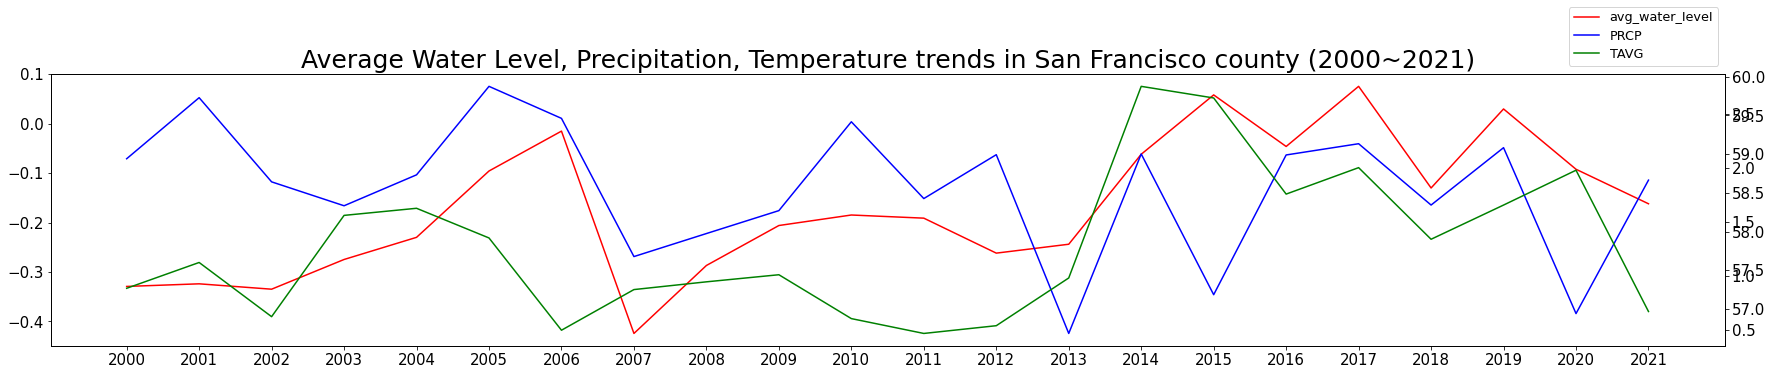

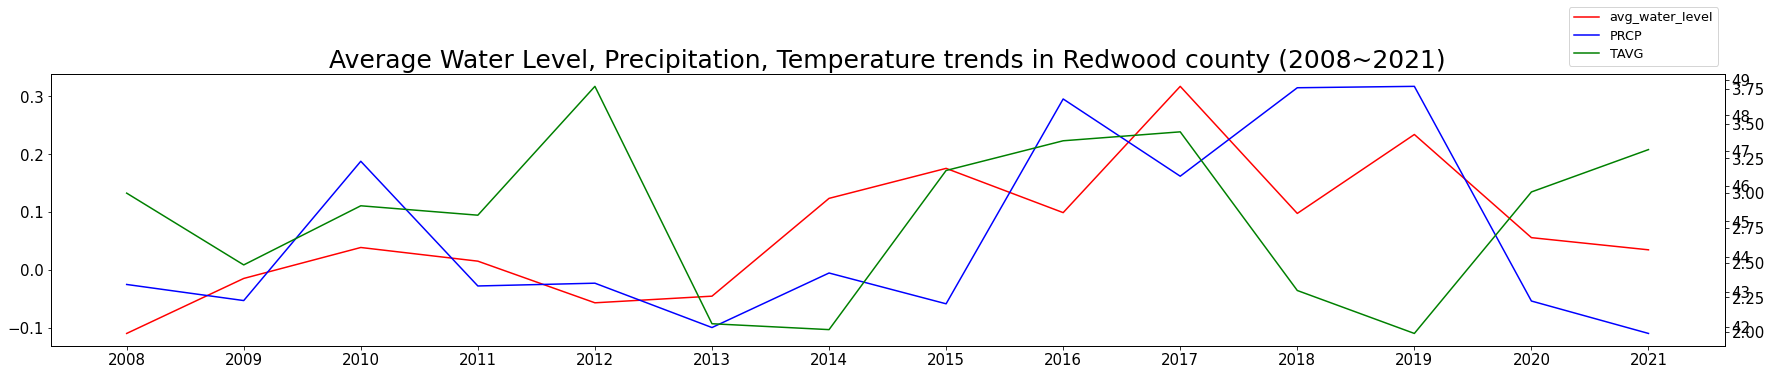

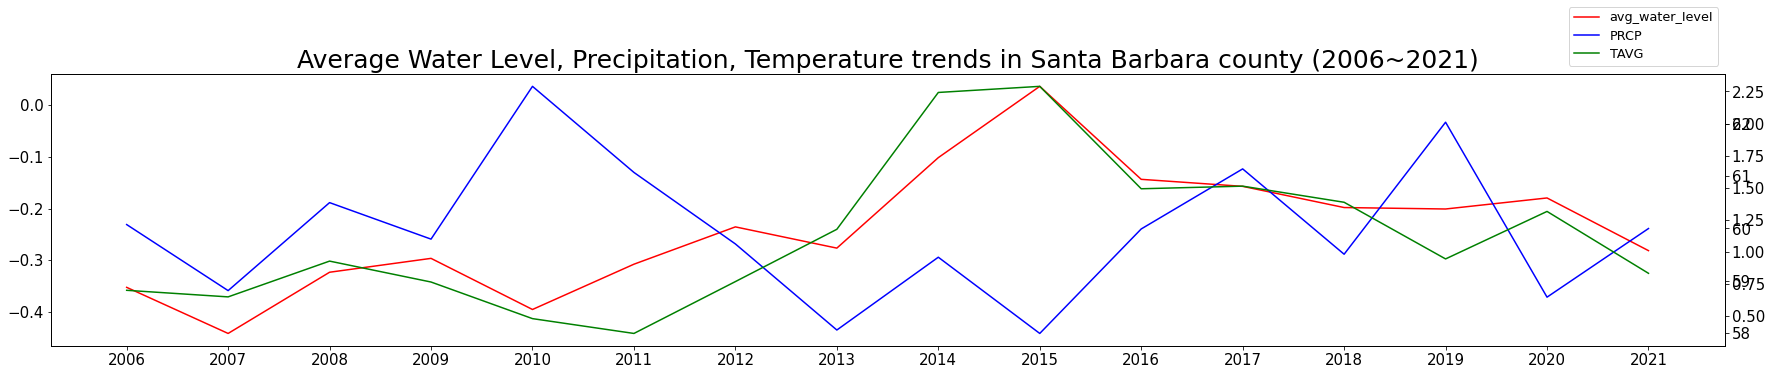

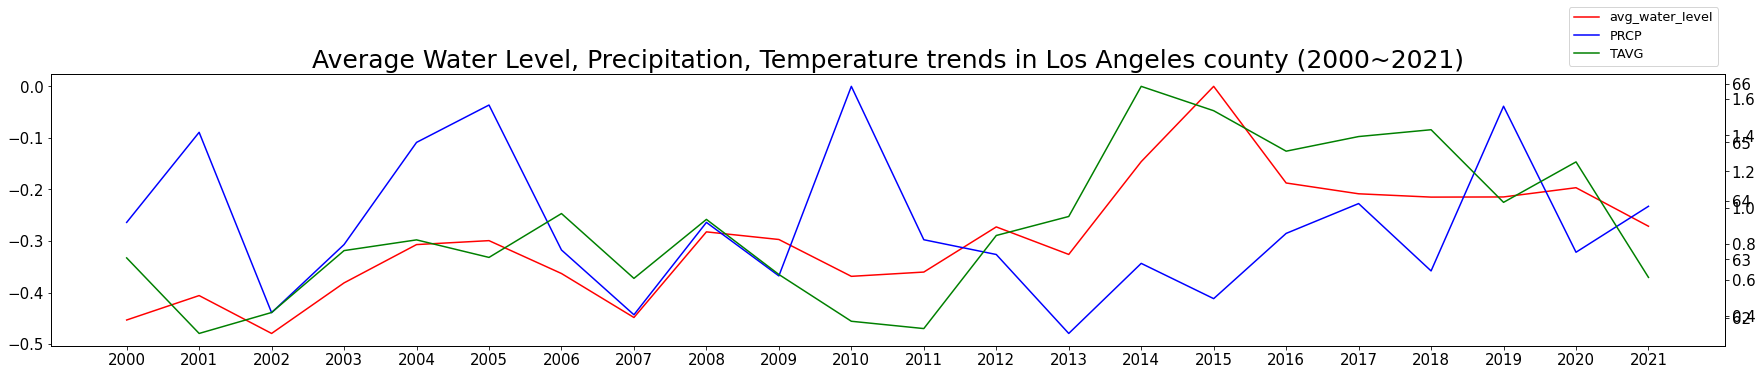

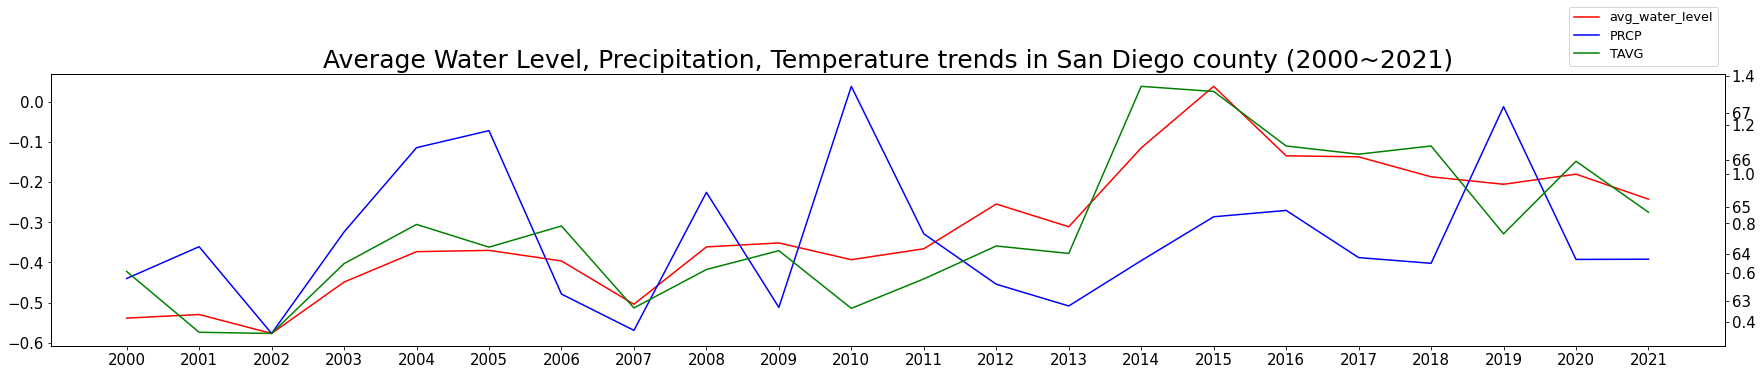

In [26]:
#Plot the trend in four counties between 2000~2021
for df,c in zip([SF_df,R_df,SB_df,LA_df,SD_df],['San Francisco','Redwood','Santa Barbara','Los Angeles','San Diego']):
    plot_city(df,c)

## Analysis of drought condition in California

In [27]:
def drought_level(y,L):
    """
    scrape the California drought data and convert it to a dataframe
    """
    url = 'https://usdmdataservices.unl.edu/api/ClimateHubStatistics/GetBasicStatisticsByAreaPercent?aoi=1&dx=0&DxLevelThresholdFrom=10&DxLevelThresholdTo=70&startdate=1/1/'+str(y)+'&enddate=1/1/'+str(y+1)+'&statisticsType=1'
    jobj = requests.get(url, headers = token).json()
    df = pd.DataFrame(jobj)
    df2 = pd.DataFrame({'Days in Level '+str(L):[df[df['USDMLevel']==str(L)+'  '].shape[0]],
                        'Avg Area Percent of '+str(L):[df[df['USDMLevel']==str(L)+'  ']['PercentCurrent'].astype('float').mean()]})
    return df2.fillna(0)

In [28]:
def lineplot_drought(df):
    """
    plot the trend of area percentage in each drought level
    """
    fig, ax1 = plt.subplots(figsize=(25,5)) 
    plt.setp(ax1.get_xticklabels(), fontsize=15)
    plt.setp(ax1.get_yticklabels(), fontsize=15)
    l1,=ax1.plot(df.index,df.iloc[:,0], color = 'red',label=df.columns[0]) 
    ax2 = ax1.twinx()
    plt.setp(ax2.get_yticklabels(), fontsize=15)
    l2,=ax2.plot(df.index,df.iloc[:,1], color = 'blue',label=df.columns[1]) 
    plt.legend(bbox_to_anchor=(1.0, 1.2),handles=[l1,l2],loc="upper right",fontsize=12.5)
    ax1.set_title('Change of area percentage in drought level '+df.columns[0][-2:], fontsize=18)
    plt.show()

In [29]:
def barplot_drought(df):
    """
    barplot of the distribution of each drought level between 2000~2021
    """
    y1 = df.iloc[0].astype('float').values
    y2 = df.iloc[1].astype('float').values
    y3 = df.iloc[2].astype('float').values
    y4 = df.iloc[3].astype('float').values
    y5 = df.iloc[4].astype('float').values
    width = 0.15
    x = np.array(df.columns).astype(float)
    plt.figure(figsize=(140, 40), dpi=80)
    plt.bar(x-0.3,y1,width,label=df.index[0])
    plt.bar(x-0.15,y2,width,label=df.index[1])
    plt.bar(x,y3,width,label=df.index[2])
    plt.bar(x+0.15,y4,width,label=df.index[3])
    plt.bar(x+0.3,y5,width,label=df.index[4])
    plt.xticks(np.arange(min(x), max(x)+1, 1.0),fontsize=70)
    plt.yticks(fontsize=70)
    plt.legend(fontsize=60)
    plt.title('Distributions of each drought level across years',fontsize=85)
    plt.show()

In [30]:
#Combine into one dataset of drought level D0
D0_df = drought_level(2000,'D0').append(drought_level(2001,'D0')).append(drought_level(2002,'D0')).append(drought_level(2003,'D0')).append(drought_level(2004,'D0')).append(drought_level(2005,'D0')).append(drought_level(2006,'D0')).append(drought_level(2007,'D0')).append(drought_level(2008,'D0')).append(drought_level(2009,'D0')).append(drought_level(2010,'D0')).append(drought_level(2011,'D0')).append(drought_level(2012,'D0')).append(drought_level(2013,'D0')).append(drought_level(2014,'D0')).append(drought_level(2015,'D0')).append(drought_level(2016,'D0')).append(drought_level(2017,'D0')).append(drought_level(2018,'D0')).append(drought_level(2019,'D0')).append(drought_level(2020,'D0')).append(drought_level(2021,'D0'))
D0_df = D0_df.set_index(sf_avg_wl.index)

In [31]:
#Combine into one dataset of drought level D1
D1_df = drought_level(2000,'D1').append(drought_level(2001,'D1')).append(drought_level(2002,'D1')).append(drought_level(2003,'D1')).append(drought_level(2004,'D1')).append(drought_level(2005,'D1')).append(drought_level(2006,'D1')).append(drought_level(2007,'D1')).append(drought_level(2008,'D1')).append(drought_level(2009,'D1')).append(drought_level(2010,'D1')).append(drought_level(2011,'D1')).append(drought_level(2012,'D1')).append(drought_level(2013,'D1')).append(drought_level(2014,'D1')).append(drought_level(2015,'D1')).append(drought_level(2016,'D1')).append(drought_level(2017,'D1')).append(drought_level(2018,'D1')).append(drought_level(2019,'D1')).append(drought_level(2020,'D1')).append(drought_level(2021,'D1'))
D1_df = D1_df.set_index(sf_avg_wl.index)

In [32]:
#Combine into one dataset of drought level D2 
D2_df = drought_level(2000,'D2').append(drought_level(2001,'D2')).append(drought_level(2002,'D2')).append(drought_level(2003,'D2')).append(drought_level(2004,'D2')).append(drought_level(2005,'D2')).append(drought_level(2006,'D2')).append(drought_level(2007,'D2')).append(drought_level(2008,'D2')).append(drought_level(2009,'D2')).append(drought_level(2010,'D2')).append(drought_level(2011,'D2')).append(drought_level(2012,'D2')).append(drought_level(2013,'D2')).append(drought_level(2014,'D2')).append(drought_level(2015,'D2')).append(drought_level(2016,'D2')).append(drought_level(2017,'D2')).append(drought_level(2018,'D2')).append(drought_level(2019,'D2')).append(drought_level(2020,'D2')).append(drought_level(2021,'D2'))
D2_df = D2_df.set_index(sf_avg_wl.index)

In [33]:
#Combine into one dataset of drought level D3
D3_df = drought_level(2000,'D3').append(drought_level(2001,'D3')).append(drought_level(2002,'D3')).append(drought_level(2003,'D3')).append(drought_level(2004,'D3')).append(drought_level(2005,'D3')).append(drought_level(2006,'D3')).append(drought_level(2007,'D3')).append(drought_level(2008,'D3')).append(drought_level(2009,'D3')).append(drought_level(2010,'D3')).append(drought_level(2011,'D3')).append(drought_level(2012,'D3')).append(drought_level(2013,'D3')).append(drought_level(2014,'D3')).append(drought_level(2015,'D3')).append(drought_level(2016,'D3')).append(drought_level(2017,'D3')).append(drought_level(2018,'D3')).append(drought_level(2019,'D3')).append(drought_level(2020,'D3')).append(drought_level(2021,'D3'))
D3_df = D3_df.set_index(sf_avg_wl.index)

In [34]:
#Combine into one dataset of drought level D4
D4_df = drought_level(2000,'D4').append(drought_level(2001,'D4')).append(drought_level(2002,'D4')).append(drought_level(2003,'D4')).append(drought_level(2004,'D4')).append(drought_level(2005,'D4')).append(drought_level(2006,'D4')).append(drought_level(2007,'D4')).append(drought_level(2008,'D4')).append(drought_level(2009,'D4')).append(drought_level(2010,'D4')).append(drought_level(2011,'D4')).append(drought_level(2012,'D4')).append(drought_level(2013,'D4')).append(drought_level(2014,'D4')).append(drought_level(2015,'D4')).append(drought_level(2016,'D4')).append(drought_level(2017,'D4')).append(drought_level(2018,'D4')).append(drought_level(2019,'D4')).append(drought_level(2020,'D4')).append(drought_level(2021,'D4'))
D4_df = D4_df.set_index(sf_avg_wl.index)

In [35]:
#Combine datasets of all the drought levels 
df_combined = pd.merge(pd.merge(pd.merge(pd.merge(D0_df,D1_df,left_index=True, right_index=True),D2_df,left_index=True, right_index=True),D3_df,left_index=True, right_index=True),D4_df,left_index=True, right_index=True)
df_combined

,Days in Level D0,Avg Area Percent of D0,Days in Level D1,Avg Area Percent of D1,Days in Level D2,Avg Area Percent of D2,Days in Level D3,Avg Area Percent of D3,Days in Level D4,Avg Area Percent of D4
Year,,,,,,,,,,
2000,19,24.466842,0,0.000000,0,0.000000,0,0.000000,0,0.000000
2001,47,41.826383,40,30.604500,27,26.040741,16,17.930625,0,0.000000
2002,22,41.213636,39,42.512051,39,33.521282,28,21.433571,0,0.000000
2003,49,42.048163,53,28.918868,28,16.452500,7,16.380000,0,0.000000
2004,20,40.189500,53,37.910189,15,19.220667,0,0.000000,0,0.000000
2005,12,18.620833,1,28.850000,0,0.000000,0,0.000000,0,0.000000
2006,24,23.273750,2,11.640000,0,0.000000,0,0.000000,0,0.000000
2007,4,62.245000,15,48.441333,50,54.076400,43,29.953256,0,0.000000
2008,7,56.587143,20,41.830500,41,35.084146,1,14.550000,0,0.000000


In [36]:
#Take transpose 
df_combined = df_combined.T 

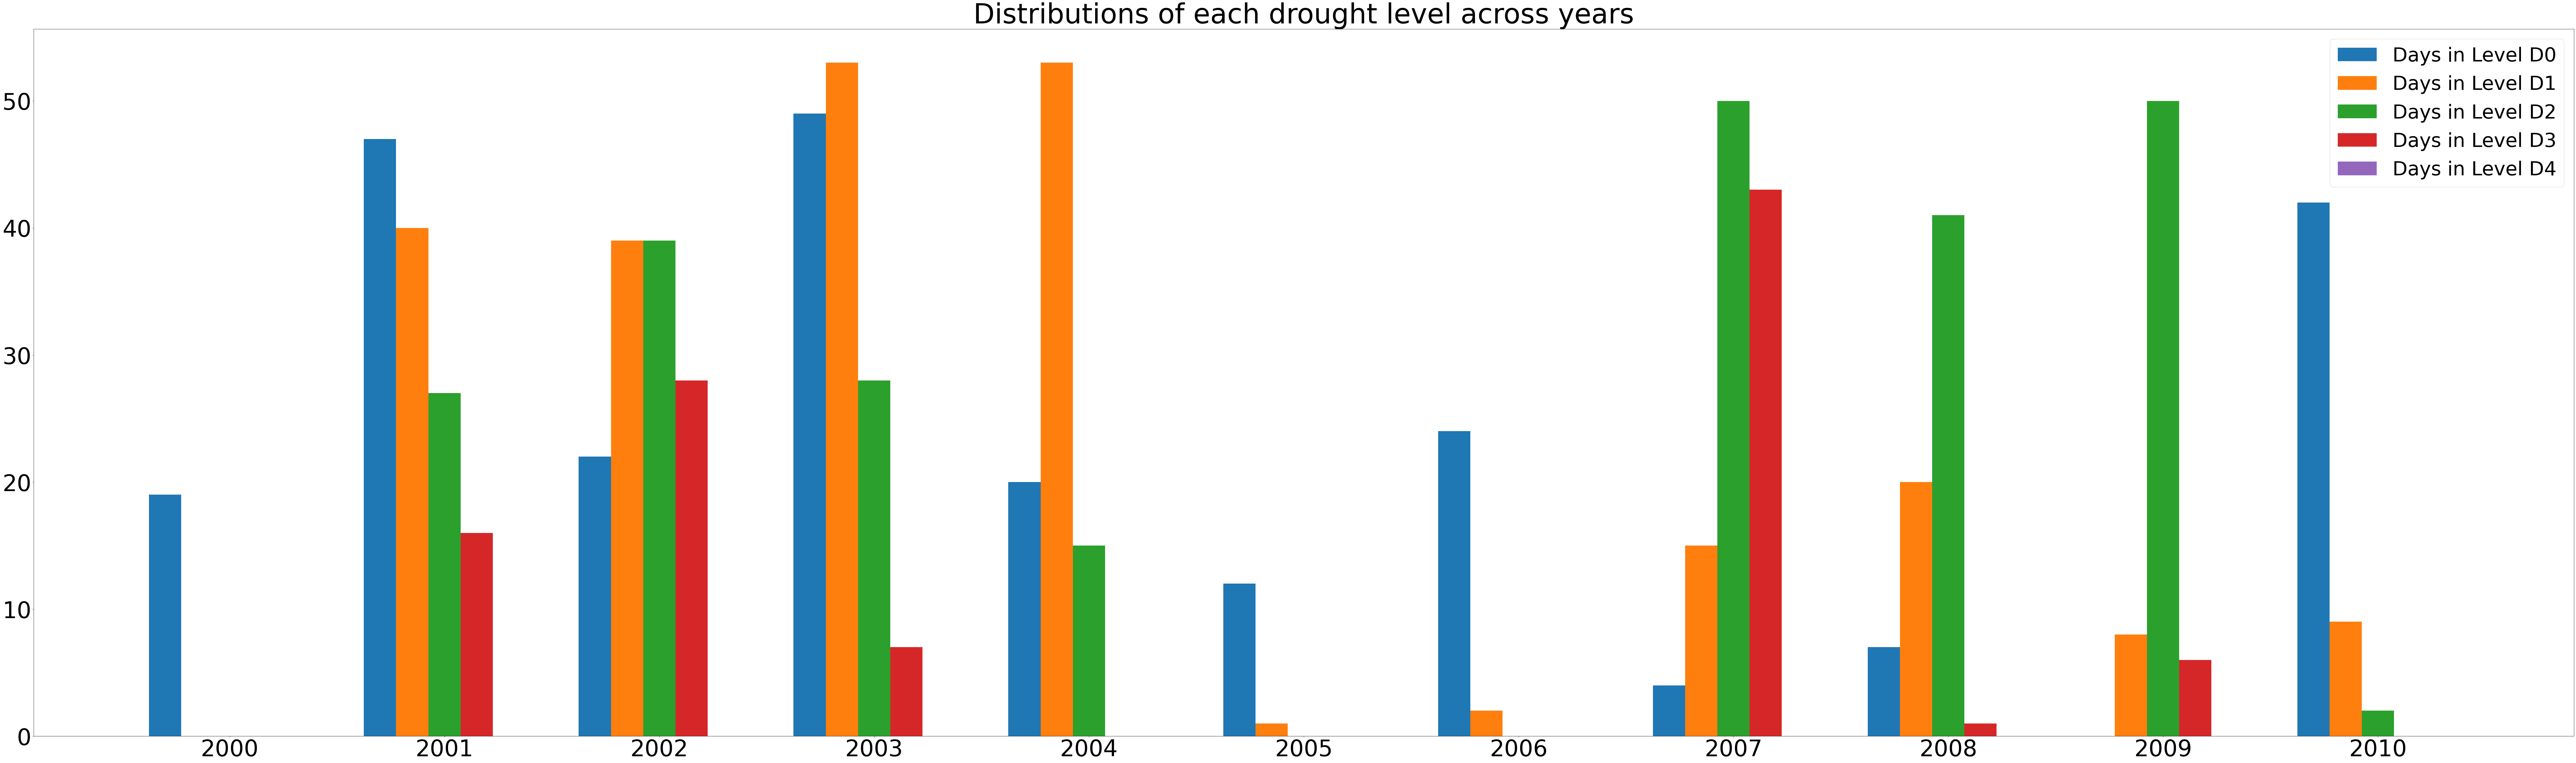

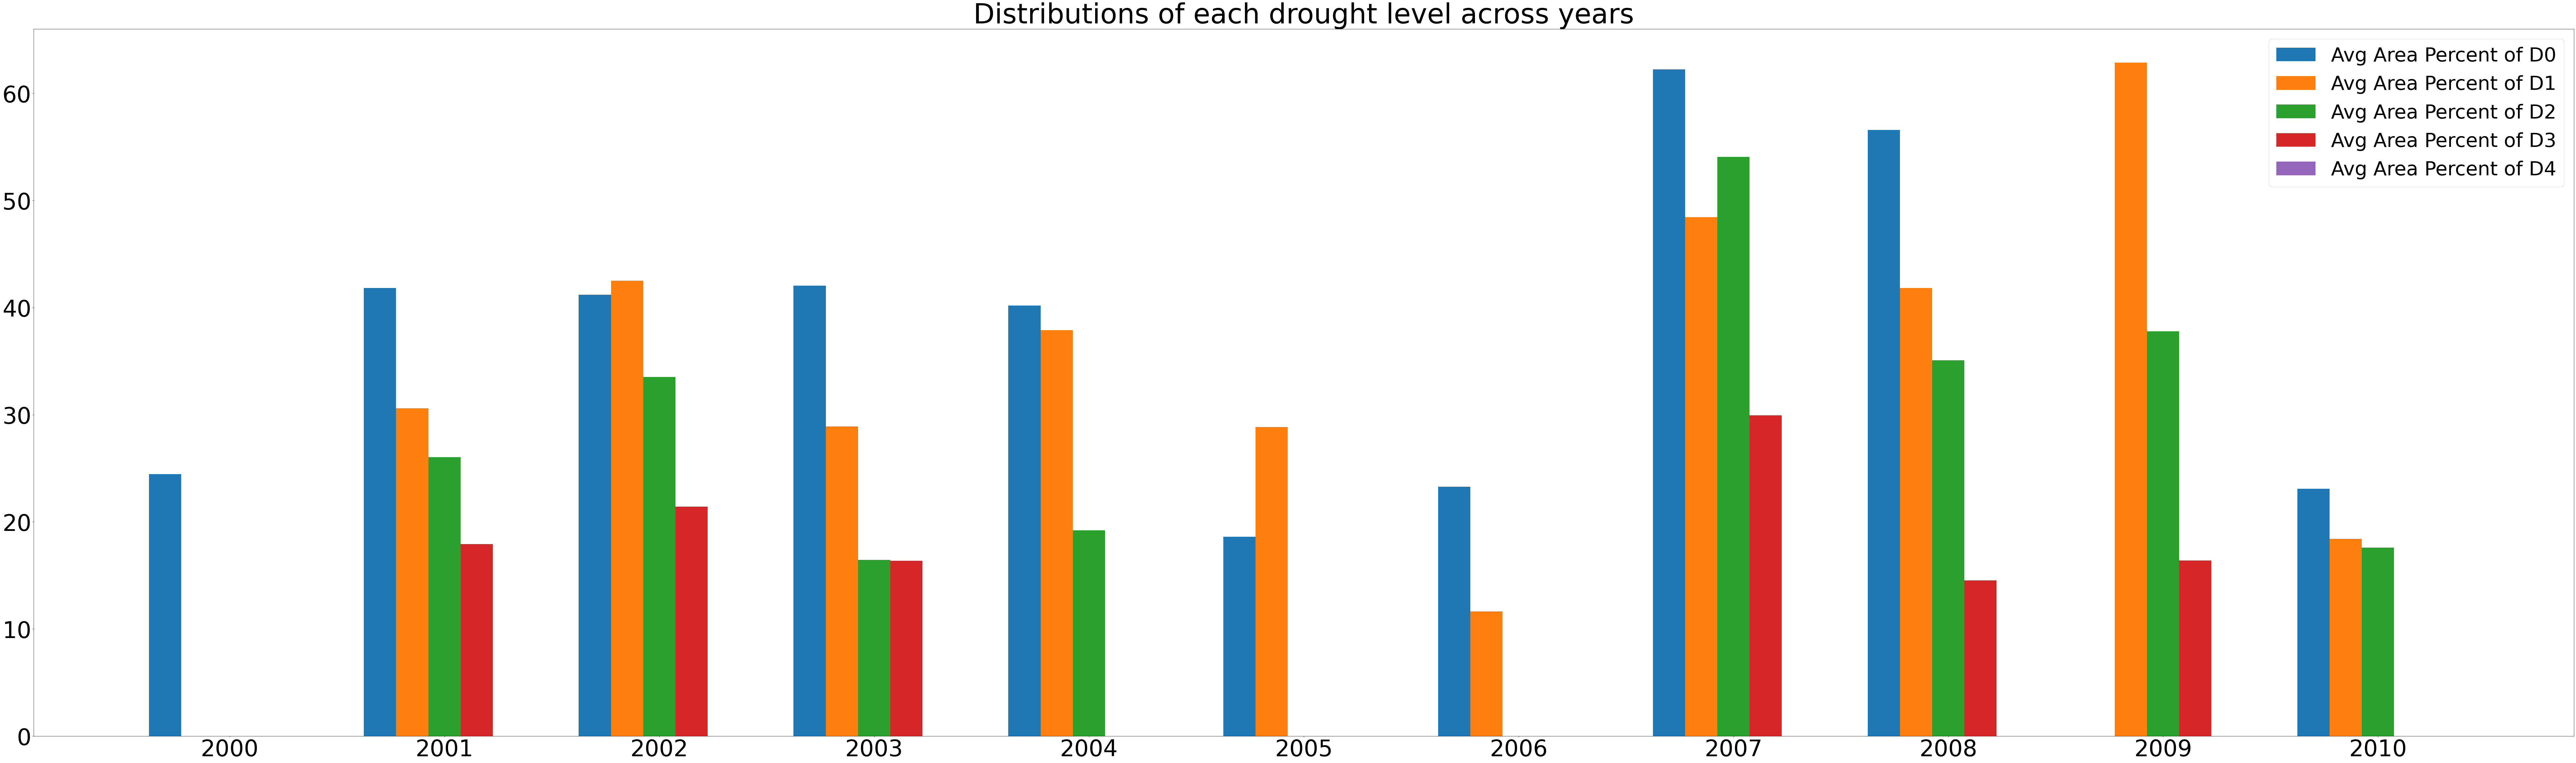

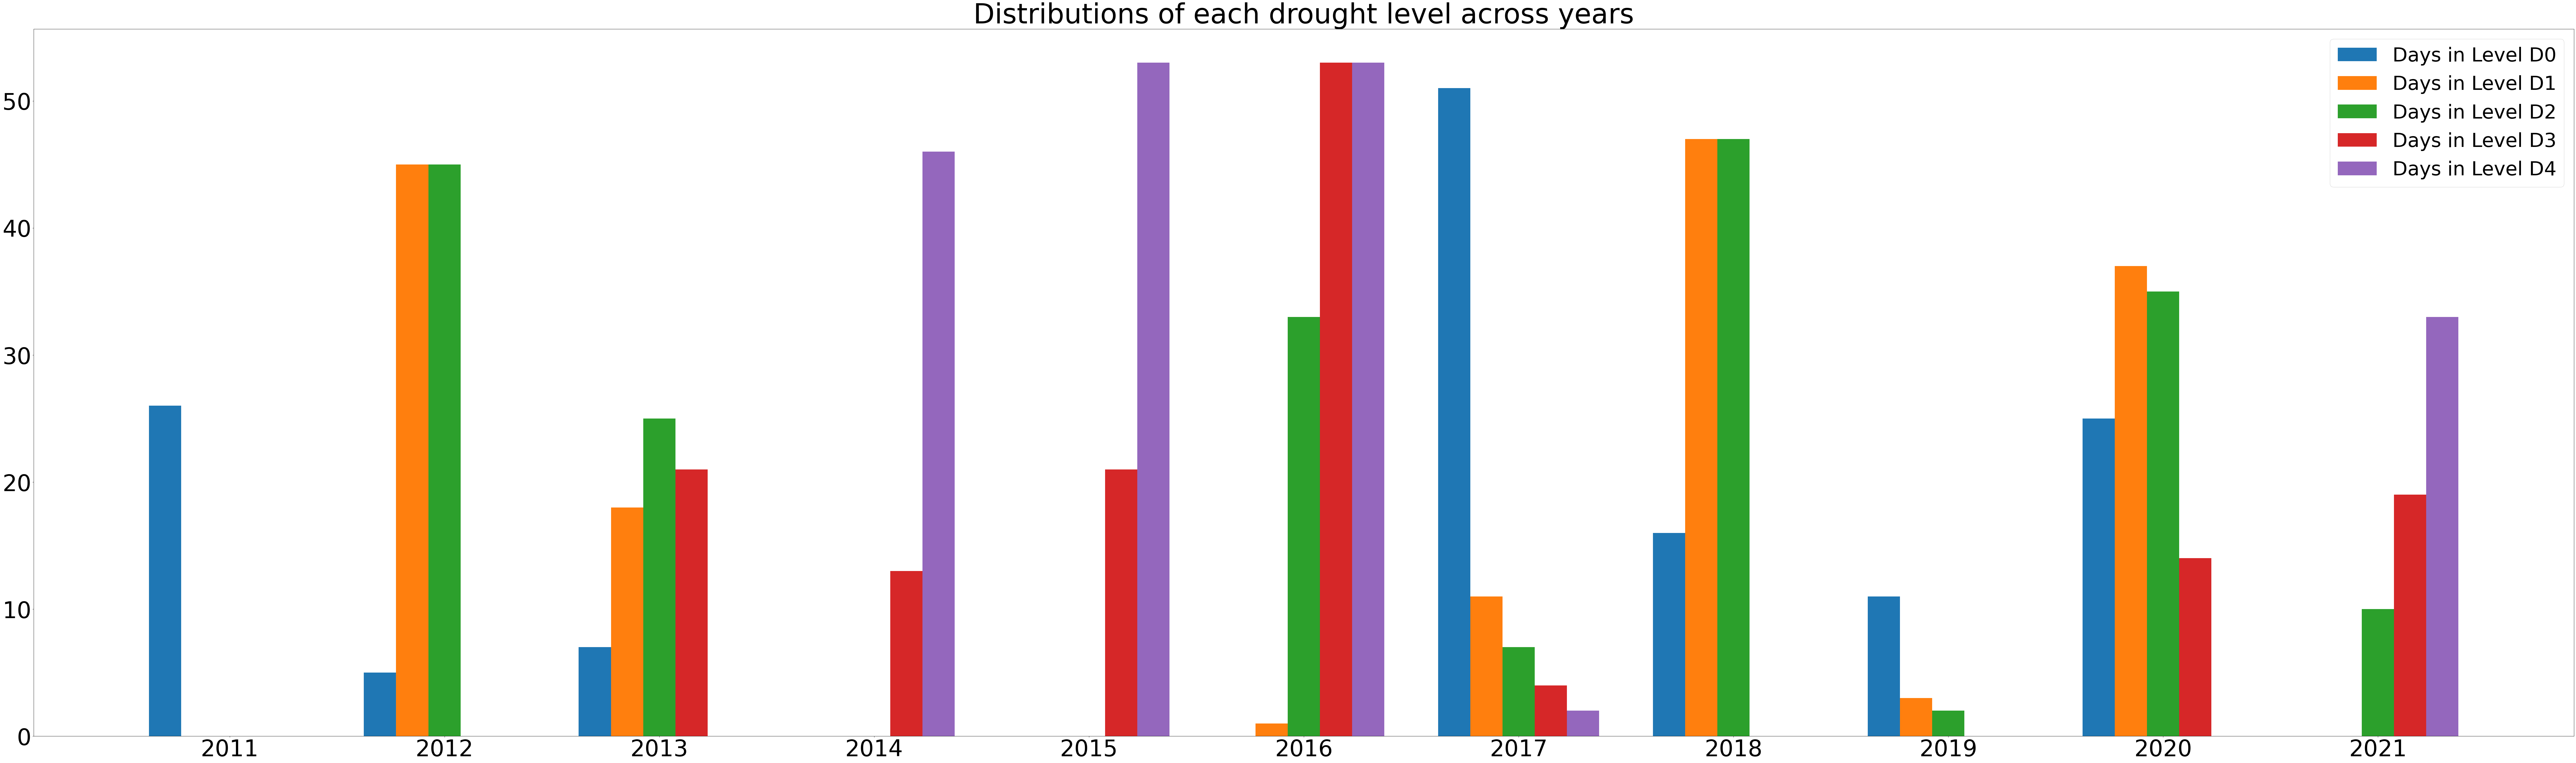

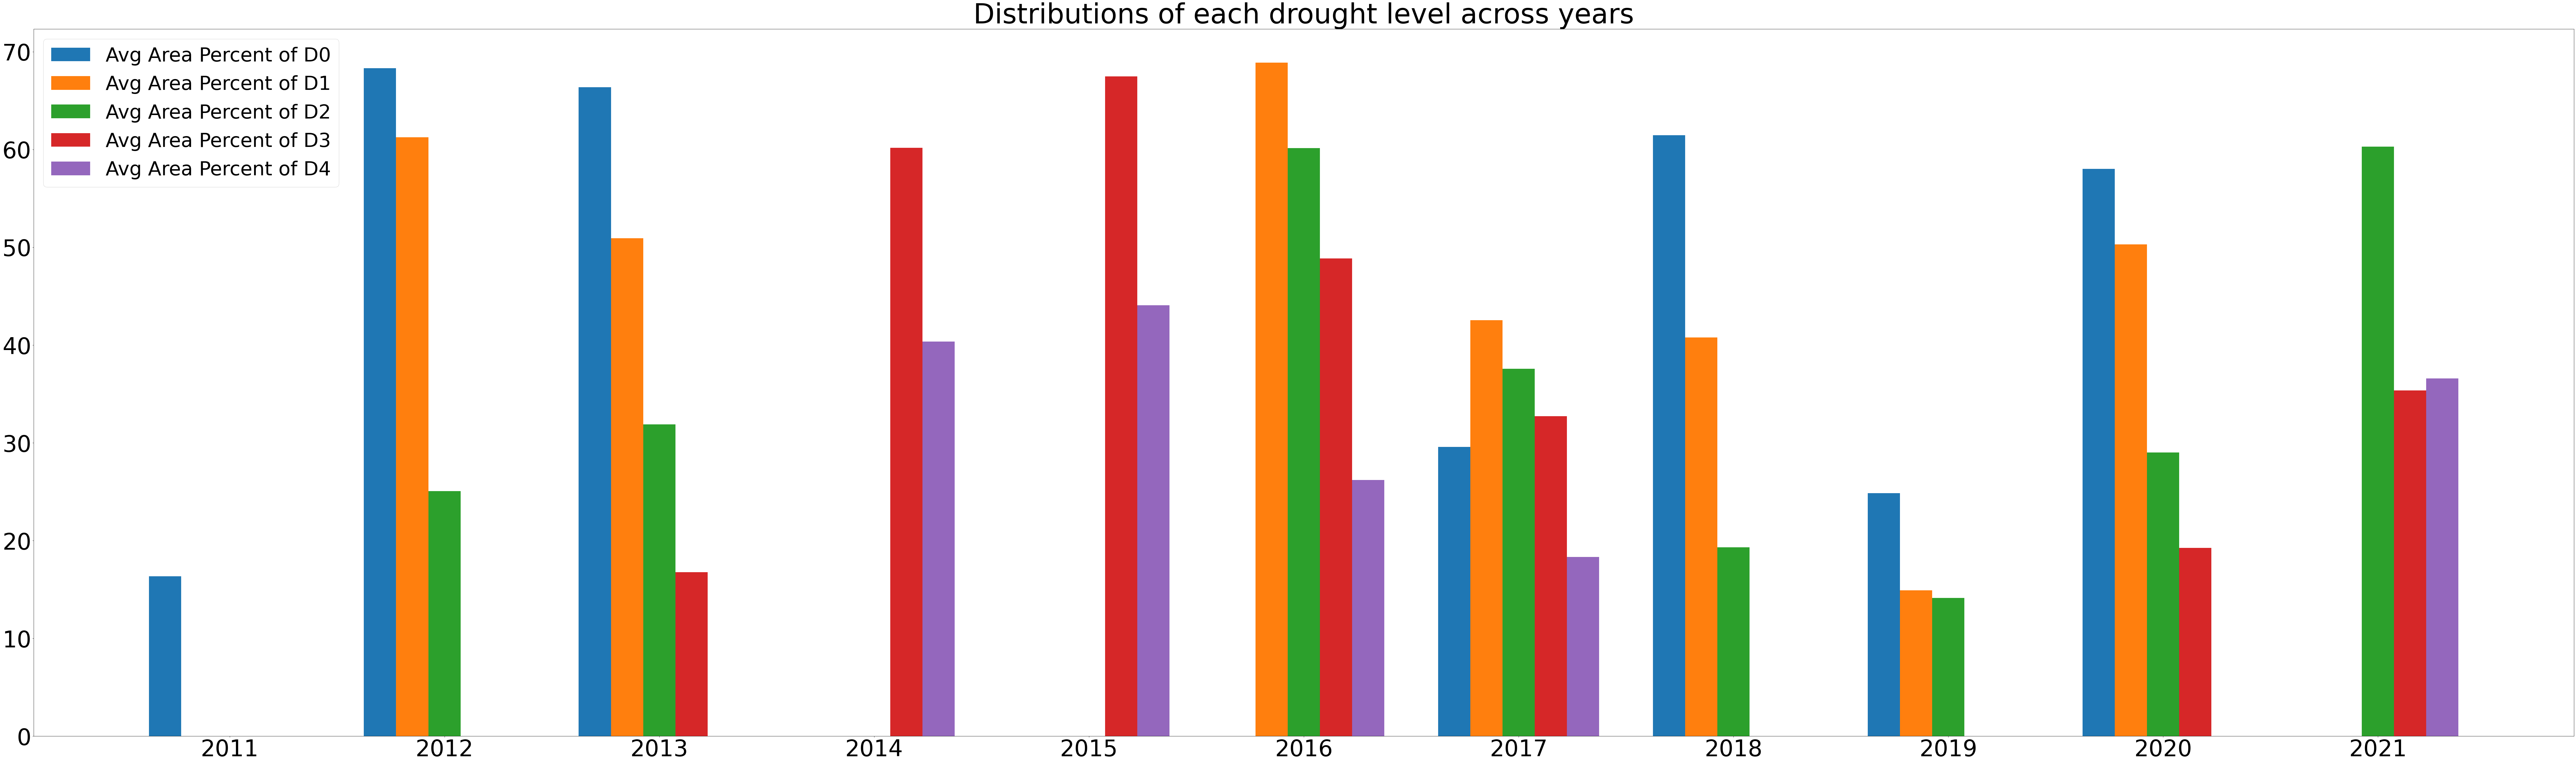

In [37]:
#Histogram showing distribution of each drought level
for df in [df_combined.iloc[::2,:11],df_combined.iloc[1:].iloc[::2,:11],df_combined.iloc[::2,11:],df_combined.iloc[1:].iloc[::2,11:]]:
    barplot_drought(df)

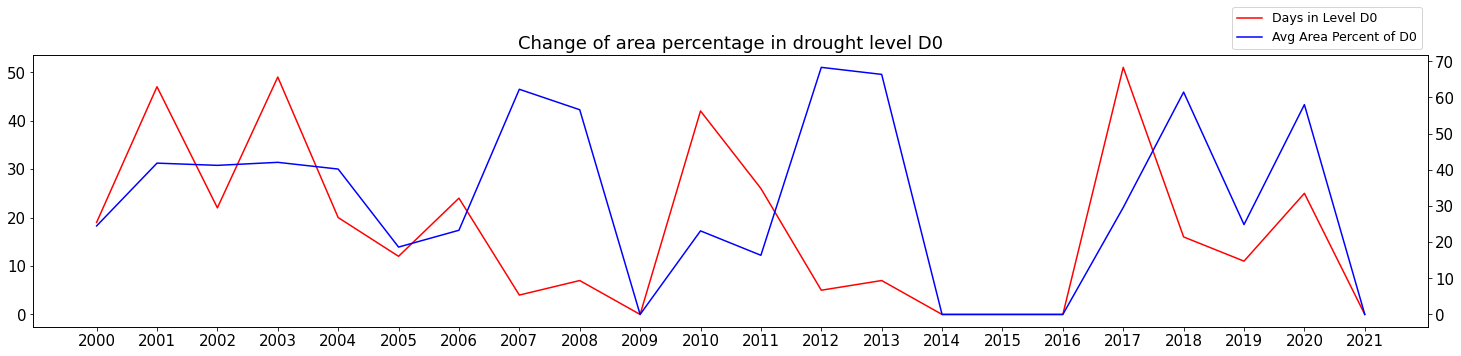

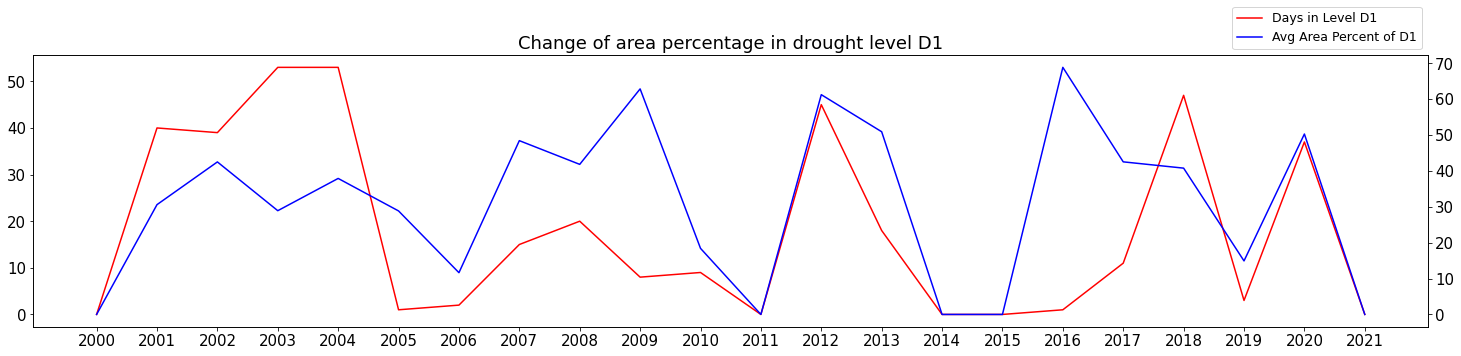

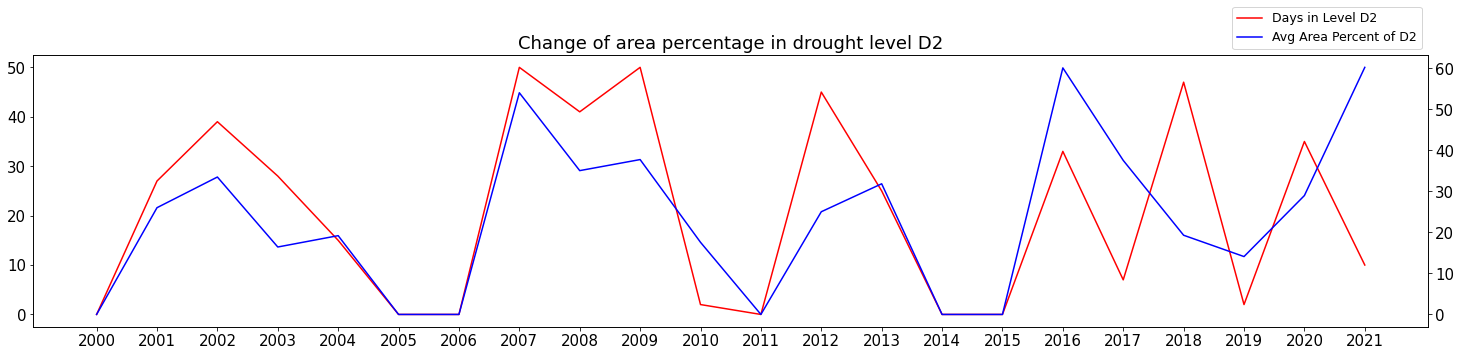

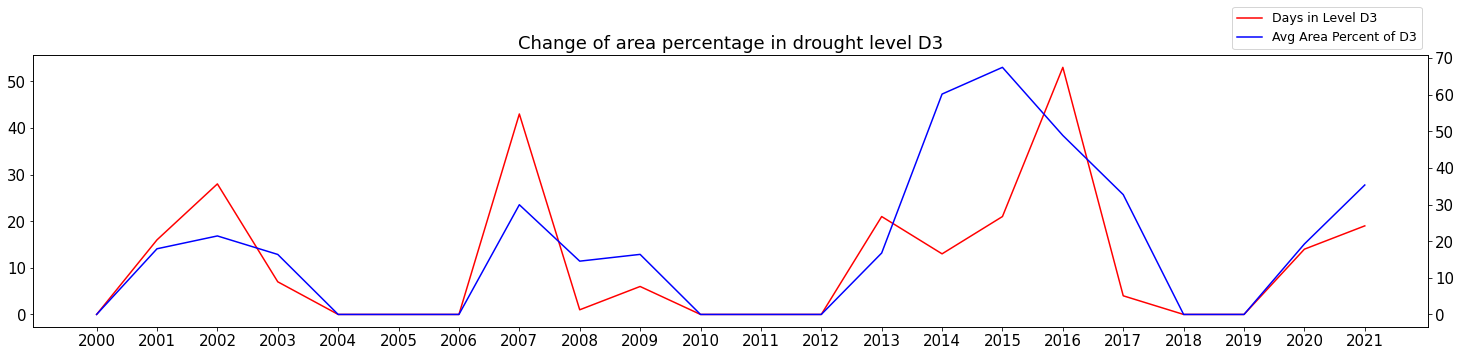

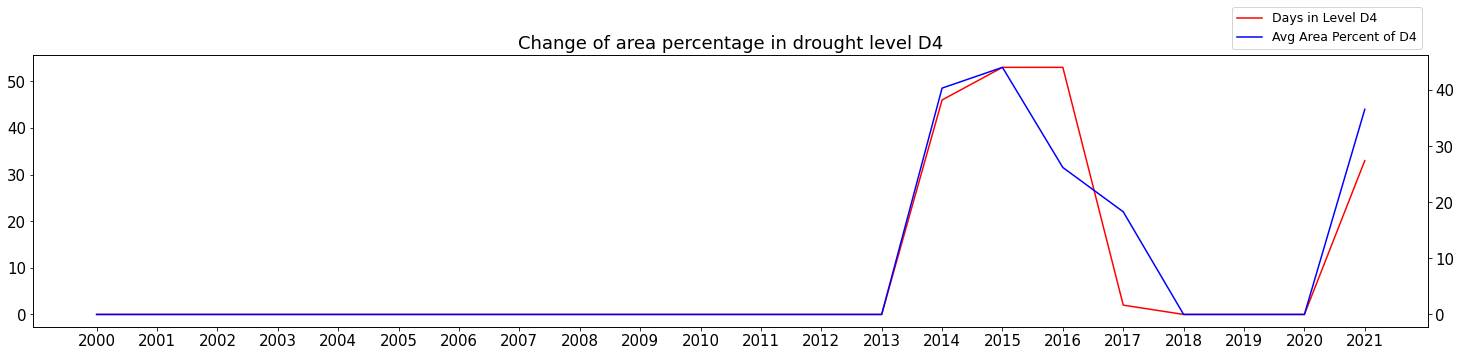

In [38]:
#Lineplot showing the trends of each drought level from 2000-2021
for df in [D0_df,D1_df,D2_df,D3_df,D4_df]:
    lineplot_drought(df)

In [39]:
#Non-consecutive dought statistics in CA
url = 'https://usdmdataservices.unl.edu/api/ConsecutiveNonConsecutiveStatistics/GetNonConsecutiveStatisticsCounty?aoi=CA&dx=0&minimumweeks=4&startdate=1/1/2000&enddate=1/1/2022'
jobj = requests.get(url, headers = token).json()
df = pd.DataFrame(jobj).sort_values(by='NonConsecutiveWeeks', ascending=False)
df1 = df.sort_values(by='NonConsecutiveWeeks', ascending=False).iloc[0:3,:][['County','NonConsecutiveWeeks']]
df2 = df.sort_values(by='NonConsecutiveWeeks', ascending=True).iloc[0:3,:][['County','NonConsecutiveWeeks']]
print('Between 2000~2021, ')
print(df1.iat[0,0]+',',df1.iat[1,0]+',',df1.iat[2,0],'have the longest duration of drought in California.')
print(df2.iat[2,0]+',',df2.iat[1,0]+',',df2.iat[0,0],'have the shortest duration of drought in California.')

Between 2000~2021, 
Imperial County, Riverside County, San Bernardino County have the longest duration of drought in California.
San Francisco County, Humboldt County, Del Norte County have the shortest duration of drought in California.
